# Mathematisches Pendel als Taktmechanismus

**Ein einführendes Beispiel**

**Aufgabe:** Mit Hilfe eines Pendels soll ein Taktmechanismus zu einer vorgegebenen Taktzeit $T^*>0$ realisiert werden. Zu bestimmen ist daher die erforderliche Anfangsauslenkung zu einer gegebenen Schwingungsdauer $T^*$. Die Schwingungsdauer $T$ bezeichnet die Zeit, welches das Pendel benötigt um wieder in die Ausgangslage zurück zu schwingen.

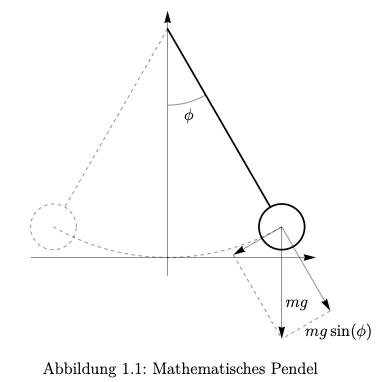

Mit Hilfe des Anfangswertproblems
\begin{equation}\label{eq:modellbeispiel}\begin{split}
\ddot{\phi}(t) & = - \frac{g}{l}\cdot \sin(\phi(t))\\
\phi(0) & = \phi_0\quad\text{und}\quad \dot{\phi}(0) = 0
\end{split}\end{equation}
können wir die Bewegung des Pendels **mathematisch modellieren** und beschreiben.

Die Differentialgleichung kann nicht geschlossen gelöst werden. Daher werden **numerische Methoden** für die Berechnung von $\phi(t)$ benötigt. Für kleine Auslenkungen kann die Näherung
$$\sin(\phi) \approx \phi$$
benutzt werden. Das **vereinfachte Modell** lautet in dem Fall
\begin{equation}\label{eq:einfachesModell}\begin{split}
\ddot{\phi}(t) & = - \frac{g}{l}\cdot \phi(t)\\
\phi(0) & = \phi_0\quad\text{und}\quad \dot{\phi}(0) = 0.
\end{split}\end{equation}
Damit wird jedoch ein weiterer **systematischer Fehler** eingeführt, ein unter Umständen sehr wesentlicher **Modellfehler**: Die Lösung des vereinfachten Modells ist gegeben durch
$$\phi(t) = \phi_0\,\cos\left(\sqrt{\frac{g}{l}}\cdot t\right).$$
Offensichtlich scheitert hier das Vorhaben die Taktzeit über die Anfangsauslenkung einzustellen. Die Taktzeit ist in dem Fall unabhängig von der Anfangsauslenkung!

## 1. Schritt

**Numerische Lösung der nichtlinearen DGL 2. Ordnung**

Um numerisch rechnen zu können, müssen sämtliche Parameter gegeben sein. Wir setzen daher
$$g = 9.81\quad\text{und}\quad l = 0.6$$

In [1]:
g = 9.81
l = 0.6

In [2]:
import sys
sys.path.append('../numerikODE/')
from odeSolvers import classicRungeKutta
import numpy as np
import matplotlib.pyplot as plt
import time

und definieren eine Funktion, welche für 
- einen gegebenen Startwert $\varphi(0) = \varphi_0$
- und der Startgeschwindigkeit $\dot{\varphi}(0) = 0$

eine Lösung berechnet:

In [3]:
def f(t,phi):
    return np.array([phi[1], -g/l*np.sin(phi[0])])

def phipendel(phi0):
    t,phi = classicRungeKutta(40,1e-2,np.array([phi0,0.]),f)
    return lambda s: np.interp(s,t,phi[:,0])

Damit können wir Lösungen für gegegebene $\varphi_0$ betrachten:

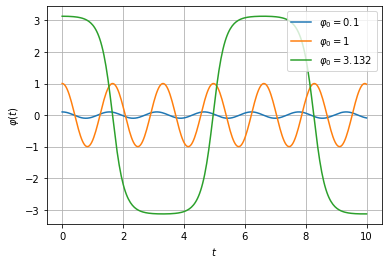

In [4]:
tp = np.linspace(0,10,300)
[plt.plot(tp,phipendel(phii)(tp), label=r'$\varphi_0=$'+str(np.round(phii,3))) for phii in [0.1,1,np.pi-0.01]]
plt.legend()
plt.grid(); plt.xlabel(r'$t$'); plt.ylabel(r'$\varphi(t)$')
plt.show()

## 2. Schritt

**Berechnen der Periodizität $T$**

Wir berechnen wiederum numerisch den Nulldurchgang von $\varphi(t)$ um daraus die Periodizität zu berechnen.

In [5]:
from scipy.optimize import root

In [6]:
sol=root(phipendel(0.1),0.3)
sol

    fjac: array([[-1.]])
     fun: array([-9.10729825e-18])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([9.10729825e-18])
       r: array([0.])
  status: 1
 success: True
       x: array([0.38871586])

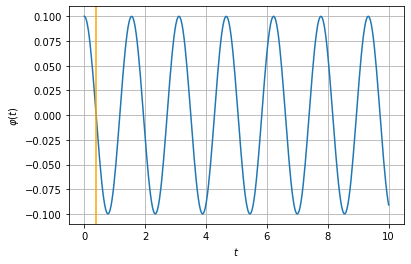

In [7]:
plt.plot(tp, phipendel(0.1)(tp))
plt.axvline(sol.x,c='orange')
plt.grid(); plt.xlabel(r'$t$'); plt.ylabel(r'$\varphi(t)$')
plt.show()

Wir erhalten daher für den Startwinkel $\varphi_0 = 0.1$ eine Periodizität von

In [8]:
4*sol.x[0]

1.554863436589423

Nun interessiert uns diese Abhängigkeit, daher $T(\varphi_0)$:

In [9]:
cpustart = time.time()
phi0s = np.linspace(0.01,np.pi-0.01,300)
Ts = np.array([4*root(phipendel(phi0),0.5).x[0] for phi0 in phi0s])
cpuend = time.time()
print('cpu-time:', cpuend-cpustart)

cpu-time: 24.756715059280396


Die Rechenzeit ist schon ziemlich lange für diese einfache Parameterstudie.

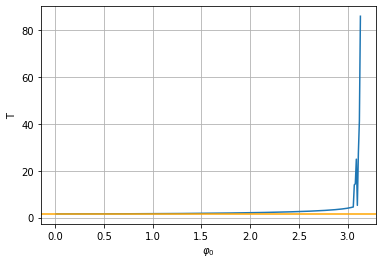

In [10]:
plt.plot(phi0s,Ts)
plt.xlabel(r'$\varphi_0$'); plt.ylabel('T'); plt.grid()
plt.axhline(2*np.pi/np.sqrt(g/l),c='orange');
plt.show()

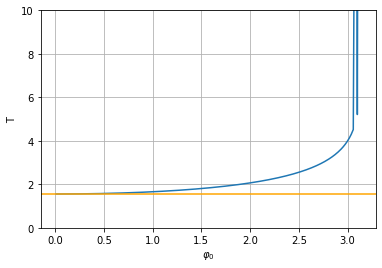

In [11]:
plt.plot(phi0s,Ts)
plt.xlabel(r'$\varphi_0$'); plt.ylabel('T'); plt.grid()
plt.ylim(0,10); plt.axhline(2*np.pi/np.sqrt(g/l),c='orange');
plt.show()

- Das Verfahren scheint bis für $\varphi_0=3$ zu funktionieren.
- Für $\varphi_0>3$ wird das Verfahren **instabil**.
- Ganz offensichtlich ist die Periodizität vom Startwinkel abhängig.
- Für einen Startwinkel $\varphi_0 \to \pi$ muss die Periodizität $T \to \infty$ streben.

## 3. Schritt

**Effektiv gesuchte Abhängigkeit**

Die Lösung im 2. Schritt ist soweit so gut. Uns interessiert aber die Umkehrfunktion:
$$\varphi_0=\varphi_0(T).$$

Für eine gegebene Periodizität $T$ soll der Startwinkel berechnet werden!

Man könnte nun wiederum einen nichtlinearen Solver belästigen. Aber eventuell reicht auch schon eine geeignetere **graphische Darstellung** der Lösung, durch Vertauschen der Achsen:

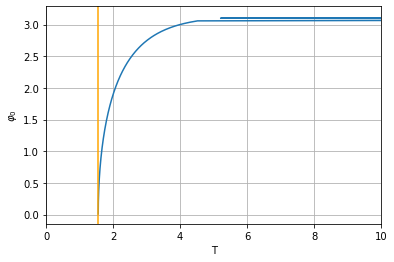

In [12]:
plt.plot(Ts, phi0s)
plt.ylabel(r'$\varphi_0$'); plt.xlabel('T'); plt.grid()
plt.xlim(0,10); plt.axvline(2*np.pi/np.sqrt(g/l),c='orange');
plt.show()

## 4. Schritt

**Effizientes, stabiles Verfahren**

Die vorgestellte Brutforce Methodik ist ganz offensichtlich nicht effizient:
- es werden für kleine Startwinkel $\varphi_0$ viel zu viele Zeitschritte berechnet,
- es wird der falsche Nulldurchgang für die Berechnung Periodizität gefunden.

**Lösung:** Wir berechnen daher die Lösung der DGL nur noch bis zum Nulldurchgang und geben diese Zeit als Rückgabewert. 

In [13]:
cpustart = time.time()
Ts2 = np.array([4*classicRungeKutta(40,1e-2,np.array([phi0,0.]),f,trigger=0)  for phi0 in phi0s])
cpuend = time.time()
print('cpu-time:', cpuend-cpustart)

cpu-time: 0.36338162422180176


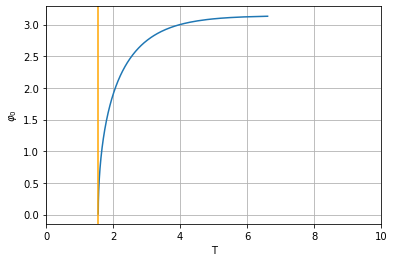

In [14]:
plt.plot(Ts2, phi0s)
plt.ylabel(r'$\varphi_0$'); plt.xlabel('T'); plt.grid()
plt.xlim(0,10); plt.axvline(2*np.pi/np.sqrt(g/l),c='orange');
plt.show()

**Fazit:**

- Numerik ist mehr als einfach nur rechnen.
- Mathematische Beschreibung basiert auf Modelle
- Modellfehler müssen beachtet werden
    - ist das Modell zu trivial, ist evtl. keine Aussage möglich
- Verfahren müssen stabil sein
- Brutforce kann teuer (0.4s vs 24s) und instabil sein!

**Ziel dieses Moduls:**

- Einen Einblick in das wissenschaftliche Rechnen (Scientific Computation) zu geben.
- Für Problemstellungen sensibilisieren.


$\Rightarrow$ Wissenschaftliches Rechnen ist integraler Bestandteil des Ingenieur Alltags.